# Pass@k curves

In [1]:
paths_to_results = [ # baselines (if compare)
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.6.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.7.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.8.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.9.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp1.0.json.gz",
]
labels = [
    "Temp 0_6",
    "Temp 0_7", 
    "Temp 0_8",
    "Temp 0_9",
    "Temp 1_0",
]
from pathlib import Path
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [18]:
from coderm.eval.metrics import get_pass_ks
from coderm.utils import gunzip_json_read
import numpy as np

all_pass_ks = {}
for l, r in zip(labels, paths_to_results):
    print(f"Reading", r)
    items = gunzip_json_read(r)["items"]
    upper_k = len(items[0]["results"])
    pass_ks = {}
    for k in range(1, upper_k+1):
        pass_ks[k] = np.mean(get_pass_ks(items, k))
    all_pass_ks[l] = pass_ks

Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.6.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.7.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.8.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.9.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp1.0.json.gz


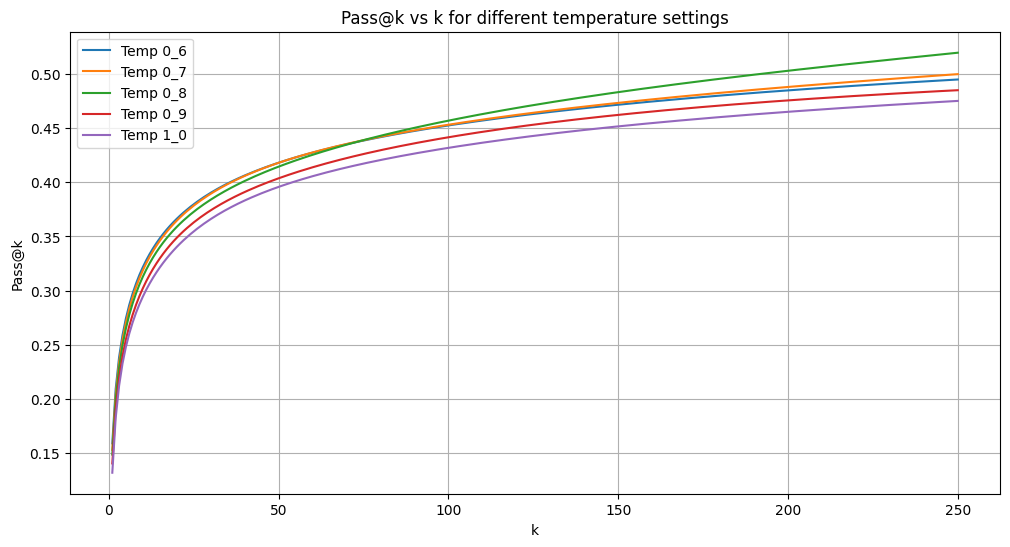

In [20]:
import matplotlib.pyplot as plt
from pathlib import Path
plt.figure(figsize=(12, 6))
for label, values in all_pass_ks.items():
    ks = list(values.keys())
    pass_at_k = list(values.values())
    linestyle = '--' if any(p in label for p in paths_to_results) and len(compare) > 0 else '-'
    plt.plot(ks, pass_at_k, label=Path(label).stem, linestyle=linestyle)

plt.xlabel('k')
plt.ylabel('Pass@k')
plt.title('Pass@k vs k for different temperature settings')
plt.legend()
plt.grid(True)
plt.savefig("../../dataset/plots/temp_experiment.pdf")
plt.show()

In [28]:
paths_to_results = [
    "../../../results/temp_generator/lcb_generator_llama3_70b_temp08.json.gz",
    "../../../results/temp_generator/lcb_generator_sc2_15b_temp08.json.gz",
    "../../../results/temp_cot_generator/lcb_generator_sc2_15b_cot_temp08.json.gz",
    "../../../results/temp_finetunes/lcb_sc2_taco_15b_temp08.json.gz",
    "../../../results/temp_generator/lcb_generator_sc2_7b_temp08.json.gz",
    "../../../results/temp_cot_generator/lcb_generator_sc2_7b_cot_temp08.json.gz",
    "../../../results/temp_finetunes/lcb_sc2_taco_7b_temp08.json.gz",
    "../../../results/temp_generator/lcb_generator_sc2_3b_temp08.json.gz",
    "../../../results/temp_cot_generator/lcb_generator_sc2_3b_cot_temp08.json.gz",
    "../../../results/temp_finetunes/lcb_sc2_taco_3b_temp08.json.gz",
]
labels = [
    "Reasoning-augmented 70B",
    "Reasoning-augmented 15B",
    "CoT 15B",
    "None 15B",
    "Reasoning-augmented 7B",
    "CoT 7B",
    "None 7B",
    "Reasoning-augmented 3B",
    "CoT 3B",
    "None 3B",
]
colors = [
    "purple",
    "red",
    "red",
    "red",
    "green",
    "green",
    "green",
    "blue",
    "blue",
    "blue",
]
from pathlib import Path
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [29]:
from coderm.eval.metrics import get_pass_ks
from coderm.utils import gunzip_json_read
import numpy as np

all_pass_ks = {}
for c, l, r in zip(colors, labels, paths_to_results):
    print(f"Reading", r)
    items = gunzip_json_read(r)["items"]
    upper_k = len(items[0]["results"])
    pass_ks = {}
    for k in range(1, upper_k+1):
        pass_ks[k] = np.mean(get_pass_ks(items, k))
    all_pass_ks[(c, l)] = pass_ks


Reading ../../../results/temp_generator/lcb_generator_llama3_70b_temp08.json.gz
Reading ../../../results/temp_generator/lcb_generator_sc2_15b_temp08.json.gz
Reading ../../../results/temp_cot_generator/lcb_generator_sc2_15b_cot_temp08.json.gz
Reading ../../../results/temp_finetunes/lcb_sc2_taco_15b_temp08.json.gz
Reading ../../../results/temp_generator/lcb_generator_sc2_7b_temp08.json.gz
Reading ../../../results/temp_cot_generator/lcb_generator_sc2_7b_cot_temp08.json.gz
Reading ../../../results/temp_finetunes/lcb_sc2_taco_7b_temp08.json.gz
Reading ../../../results/temp_generator/lcb_generator_sc2_3b_temp08.json.gz
Reading ../../../results/temp_cot_generator/lcb_generator_sc2_3b_cot_temp08.json.gz
Reading ../../../results/temp_finetunes/lcb_sc2_taco_3b_temp08.json.gz


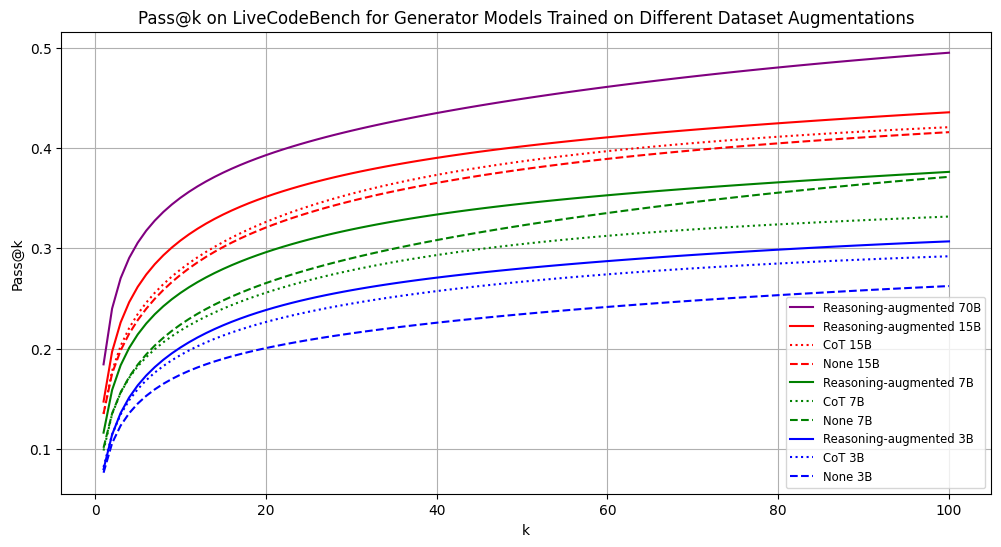

In [30]:
import matplotlib.pyplot as plt
from pathlib import Path
plt.figure(figsize=(12, 6))
for (color, label), values in all_pass_ks.items():
    ks = list(values.keys())
    pass_at_k = list(values.values())
    if "None" in label:
        linestyle = "dashed"
    elif "Reasoning-augmented" in label:
        linestyle = "solid"
    elif "CoT" in label:
        linestyle = "dotted"
    else:
        raise ValueError("unknown style in label: " + label)
    plt.plot(ks, pass_at_k, label=Path(label).stem, linestyle=linestyle, color=color)

plt.xlabel('k')
plt.ylabel('Pass@k')
plt.title('Pass@k on LiveCodeBench for Generator Models Trained on Different Dataset Augmentations')
plt.legend(fontsize='small')
plt.grid(True)
plt.savefig("../../dataset/plots/diversity_generation.pdf")
plt.show()

# ORM Pass@{1, n}

In [9]:
paths_to_results = [
    "../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz",
    "../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_7b.json.gz",
    "../../../results/orm_results/lcb_generator_sc2_7b_temp08_orm_15b.json.gz",
    "../../../results/orm_results/lcb_generator_sc2_7b_temp08_orm_7b.json.gz",
]
labels = [
    "Generator-15B + ORM-15B",
    "Generator-15B + ORM-7B",
    "Generator-7B + ORM-15B",
    "Generator-7B + ORM-7B",
]
from pathlib import Path
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [12]:
from coderm.eval.metrics import get_orm_acc
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm

all_orm_accs = {}
for l, r in zip(labels, paths_to_results):
    print(f"Reading", r, " --- ", l)
    items = gunzip_json_read(r)["items"]
    upper_n = len(items[0]["results"])
    orm_accs = {}
    for n in tqdm(list(range(1, upper_n+1))):
        orm_accs[n] = np.mean(get_orm_acc(items, n=n, perms=100)[0])
    all_orm_accs[l] = orm_accs

Reading ../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz  ---  Generator-15B + ORM-15B


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:51<00:00,  1.95it/s]


Reading ../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_7b.json.gz  ---  Generator-15B + ORM-7B


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.16it/s]


Reading ../../../results/orm_results/lcb_generator_sc2_7b_temp08_orm_15b.json.gz  ---  Generator-7B + ORM-15B


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:47<00:00,  2.10it/s]


Reading ../../../results/orm_results/lcb_generator_sc2_7b_temp08_orm_7b.json.gz  ---  Generator-7B + ORM-7B


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.15it/s]


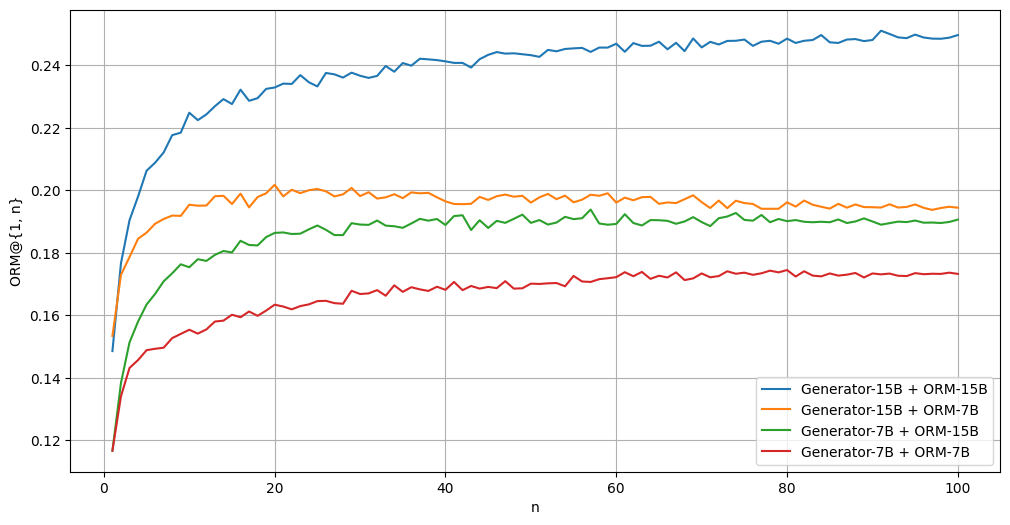

In [13]:
import matplotlib.pyplot as plt
from pathlib import Path
plt.figure(figsize=(12, 6))
for label, values in all_orm_accs.items():
    ks = list(values.keys())
    pass_at_k = list(values.values())
    linestyle = '--' if any(p in label for p in paths_to_results) and len(compare) > 0 else '-'
    plt.plot(ks, pass_at_k, label=Path(label).stem, linestyle=linestyle)

plt.xlabel('n')
plt.ylabel('ORM@{1, n}')
plt.legend()
plt.grid(True)
plt.show()

# ORM Pass@{k, 100} vs Pass@k

In [14]:
paths_to_results = [
    "../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz",
]
labels = [
    "Generator-15B",
]
from pathlib import Path
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [15]:
from coderm.eval.metrics import get_orm_acc, get_pass_ks
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm

all_orm_accs = {}
all_passk_accs = {}
for l, r in zip(labels, paths_to_results):
    print(f"Reading", r, " --- ", l)
    items = gunzip_json_read(r)["items"]
    upper_n = len(items[0]["results"])
    orm_accs = {}
    passk_accs = {}
    for k in tqdm(list(range(1, upper_n+1))):
        orm_accs[k] = np.mean(get_orm_acc(items, n=upper_n, k=k)[0])
        passk_accs[k] = np.mean(get_pass_ks(items, k=k))
    all_orm_accs[l] = orm_accs
    all_passk_accs[l] = passk_accs

Reading ../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz  ---  Generator-15B


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 87.93it/s]


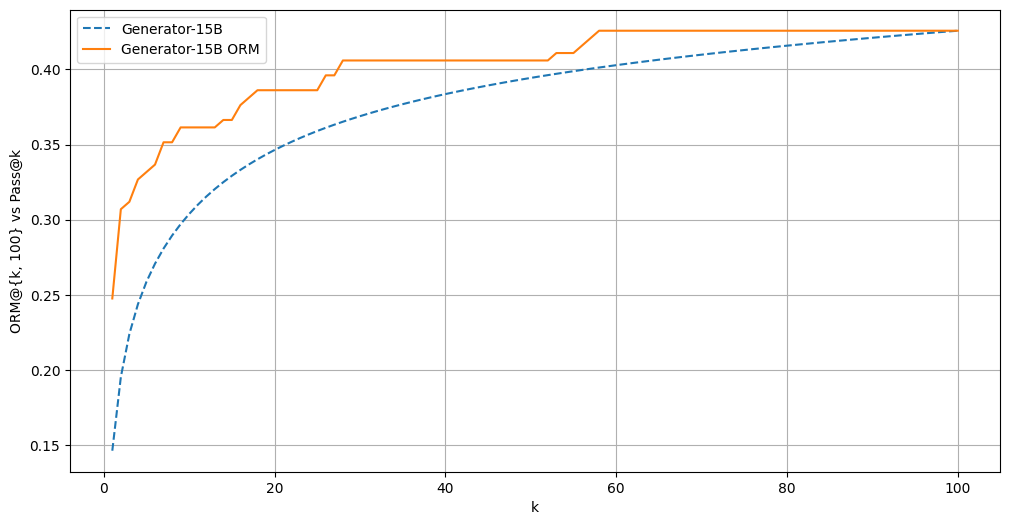

In [16]:
import matplotlib.pyplot as plt
from pathlib import Path
plt.figure(figsize=(12, 6))

for label, values in all_passk_accs.items():
    ks = list(values.keys())
    pass_at_k = list(values.values())
    linestyle = '--'
    plt.plot(ks, pass_at_k, label=Path(label).stem, linestyle=linestyle)

for label, values in all_orm_accs.items():
    ks = list(values.keys())
    orm_acc = list(values.values())
    linestyle = '-'
    plt.plot(ks, orm_acc, label=Path(label).stem + " ORM", linestyle=linestyle)


plt.xlabel('k')
plt.ylabel('ORM@{k, 100} vs Pass@k')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
def compute_orm_accuracy(params):
    items, k, n, perms = params
    orm_acc = np.mean(get_orm_acc(items, n=n, k=k, perms=perms)[0])
    return k, n, orm_acc

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from coderm.eval.metrics import get_orm_acc
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm
import matplotlib.colors as mcolors
from pathlib import Path
from multiprocess import Pool
import os

chunksize = 256

p = "../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz"
assert Path(p).exists(), f"Path {p} doesn't exist!"

print(f"Reading", p)
items = gunzip_json_read(p)["items"]
upper_n = len(items[0]["results"]) 
upper_n = 100
orm_accs = {}

params_list = [(items, k, n, 10) for k in range(1, upper_n+1) for n in range(1, upper_n+1)]

with Pool(processes=os.cpu_count()) as pool: 
    results = list(tqdm(pool.imap(compute_orm_accuracy, params_list, chunksize=chunksize), total=len(params_list)))
    
for k, n, acc in results:
    orm_accs[(k, n)] = acc

Reading ../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:48<00:00, 206.58it/s]


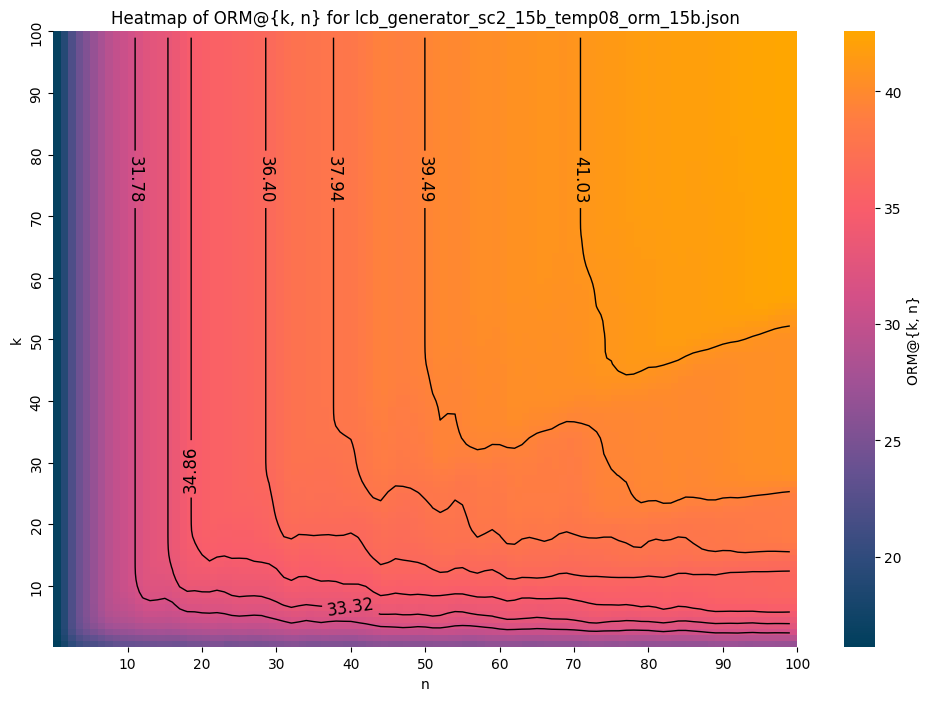

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.colors as mcolors
from pathlib import Path

# Define the custom color map
colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Assuming 'orm_accs' is a dictionary with (k, n) keys and accuracy values scaled by 100
data = []
ks = []
ns = []
for (k, n), acc in orm_accs.items():
    ks.append(k)
    ns.append(n)
    data.append(acc * 100)  # Multiply by 100 to scale the accuracy percentage
df = pd.DataFrame({'k': ks, 'n': ns, 'Accuracy': data})
pivot_table = df.pivot(index="k", columns="n", values="Accuracy")

# Apply Gaussian smoothing
smoothed_data = gaussian_filter(pivot_table, sigma=1)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(smoothed_data, cmap=cmap, cbar_kws={'label': 'ORM@{k, n}'})
contours = plt.contour(smoothed_data, levels=np.linspace(np.percentile(smoothed_data, 15), smoothed_data.max(), 8), colors='black', linewidths=1.0)
plt.clabel(contours, inline=True, fontsize=12)
plt.title(f'Heatmap of ORM@{{k, n}} for {Path(p).stem}')

# Adjust tick marks to start from zero and step by 10
xtick_marks = np.arange(0, pivot_table.shape[1] + 1, 10)[1:]
ytick_marks = np.arange(0, pivot_table.shape[0] + 1, 10)[1:]
plt.xticks(xtick_marks, xtick_marks, rotation=0.5)
plt.yticks(ytick_marks, ytick_marks)

# Invert y-axis to have the lowest index at the bottom and increase upwards
ax.invert_yaxis()

plt.xlabel('n')
plt.ylabel('k')
plt.show()

# RL Pass@1 over time vs SFT Pass@1

In [30]:
dirs = [
    "../../../results/rl_results/onlinedpo_15b_v2/",
    "../../../results/greedy_generator/sc2_15b_checkpoints/",
]
labels = [
    "ODPO+ORM-15B",
    "SFT",
]
step_0s = [
    "../../../results/greedy_generator/lcb_generator_sc2_15b_greedy.json.gz",
    "../../../results/greedy_baselines/lcb_sc2_15b_greedy.json.gz",
]
benchmark = "livecodebench"
base_path = "../../../results/greedy_baselines/lcb_sc2_15b_greedy.json.gz"
base_label = "Base Model"

In [31]:
from coderm.eval.metrics import get_pass_ks
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm
from pathlib import Path

all_pass1s_accs = {}
for base_lbl, d, step0 in zip(labels, dirs, step_0s):
    step_to_res = []
    step = 0
    for p in [Path(step0)] + list(Path(d).iterdir()):
        if step != 0:
            if benchmark not in p.stem:
                continue
            step = int(p.stem.split("checkpoint-")[1].split("_")[0])
        items = gunzip_json_read(p)["items"]
        pass_at_1 = np.mean(get_pass_ks(items, k=1))
        step_to_res.append((step, pass_at_1))
        step = None

    step_to_res.sort(key=lambda i: i[0])
    all_pass1s_accs[base_lbl] = step_to_res


base_pass1 = np.mean(get_pass_ks(gunzip_json_read(base_path)["items"], k=1))

all_pass1s_accs

{'ODPO+ORM-15B': [(0, 0.16831683168316833),
  (10, 0.15841584158415842),
  (20, 0.16336633663366337),
  (30, 0.17326732673267325),
  (40, 0.17326732673267325),
  (50, 0.18811881188118812),
  (60, 0.19306930693069307),
  (70, 0.18811881188118812),
  (80, 0.18811881188118812),
  (90, 0.18316831683168316),
  (100, 0.19306930693069307),
  (110, 0.19306930693069307)],
 'SFT': [(0, 0.14356435643564355),
  (121, 0.13861386138613863),
  (242, 0.15346534653465346),
  (363, 0.16336633663366337),
  (484, 0.16831683168316833),
  (605, 0.15346534653465346),
  (726, 0.14356435643564355),
  (847, 0.14356435643564355),
  (968, 0.16336633663366337),
  (1068, 0.16831683168316833)]}

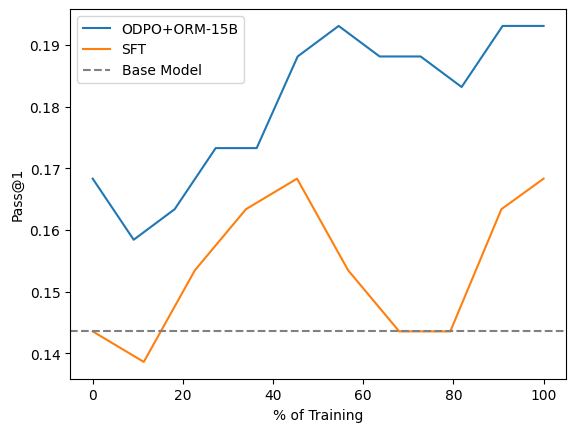

In [34]:
import matplotlib.pyplot as plt

max_x_values = {key: max([x[0] for x in value]) for key, value in all_pass1s_accs.items()}

fig, ax = plt.subplots()

for key, value in all_pass1s_accs.items():
    x_values = [(x[0] / max_x_values[key]) * 100 for x in value]
    y_values = [y[1] for y in value]
    ax.plot(x_values, y_values, label=key)

ax.axhline(y=base_pass1, color='gray', linestyle='--', label=base_label)


ax.set_xlabel('% of Training')
ax.set_ylabel('Pass@1')
#ax.set_title('t')
ax.legend()

plt.show()